In [183]:
import pandas as pd
import numpy as np
import sklearn as sk
import string
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
preprocess_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')

preprocess_data.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [184]:
table = str.maketrans("", "", string.punctuation)

preprocess_data['mean_length_of_song_name'] =  preprocess_data.song.apply(lambda x: (len(x)))

In [185]:
preprocess_data.groupby('artist').mean(numeric_only = True)

,year,length,commas,exclamations,colons,hyphens,mean_length_of_song_name
artist,,,,,,,
abba,2003.214286,1219.992063,11.547619,0.238095,0.126984,3.904762,17.063492
blind-guardian,2007.284404,1348.376147,4.385321,0.403670,0.385321,1.036697,16.165138
gangstarr,2005.928000,2606.968000,30.624000,0.856000,0.312000,4.632000,14.008000


In [186]:
X = preprocess_data[['year', 'length', 'commas', 'exclamations', 'colons', 'hyphens']]

y = preprocess_data['artist']

In [187]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)


In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [189]:
from sklearn.model_selection import cross_val_score

max_depth_values = range(1,20)

scores_data = pd.DataFrame()

for max_depth in max_depth_values:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)

  mean_cross = cross_val_score(clf, X_train, y_train, cv = 3).mean()

  temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score], 'cross_val_score': [mean_cross]})

  scores_data = pd.concat([scores_data, temp_score_data])


In [190]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score','test_score', 'cross_val_score'], var_name = 'set_type', value_name = 'score')

scores_data_long

,max_depth,set_type,score
0,1,train_score,0.647303
1,2,train_score,0.705394
2,3,train_score,0.780083
3,4,train_score,0.834025
4,5,train_score,0.838174
5,6,train_score,0.871369
6,7,train_score,0.892116
7,8,train_score,0.912863
8,9,train_score,0.921162
9,10,train_score,0.929461


<Axes: xlabel='max_depth', ylabel='score'>

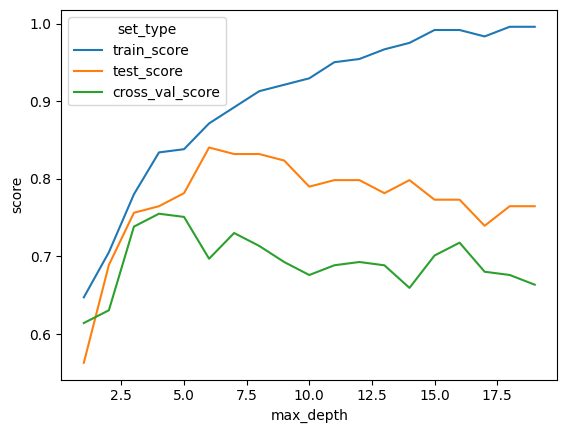

In [191]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [192]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)

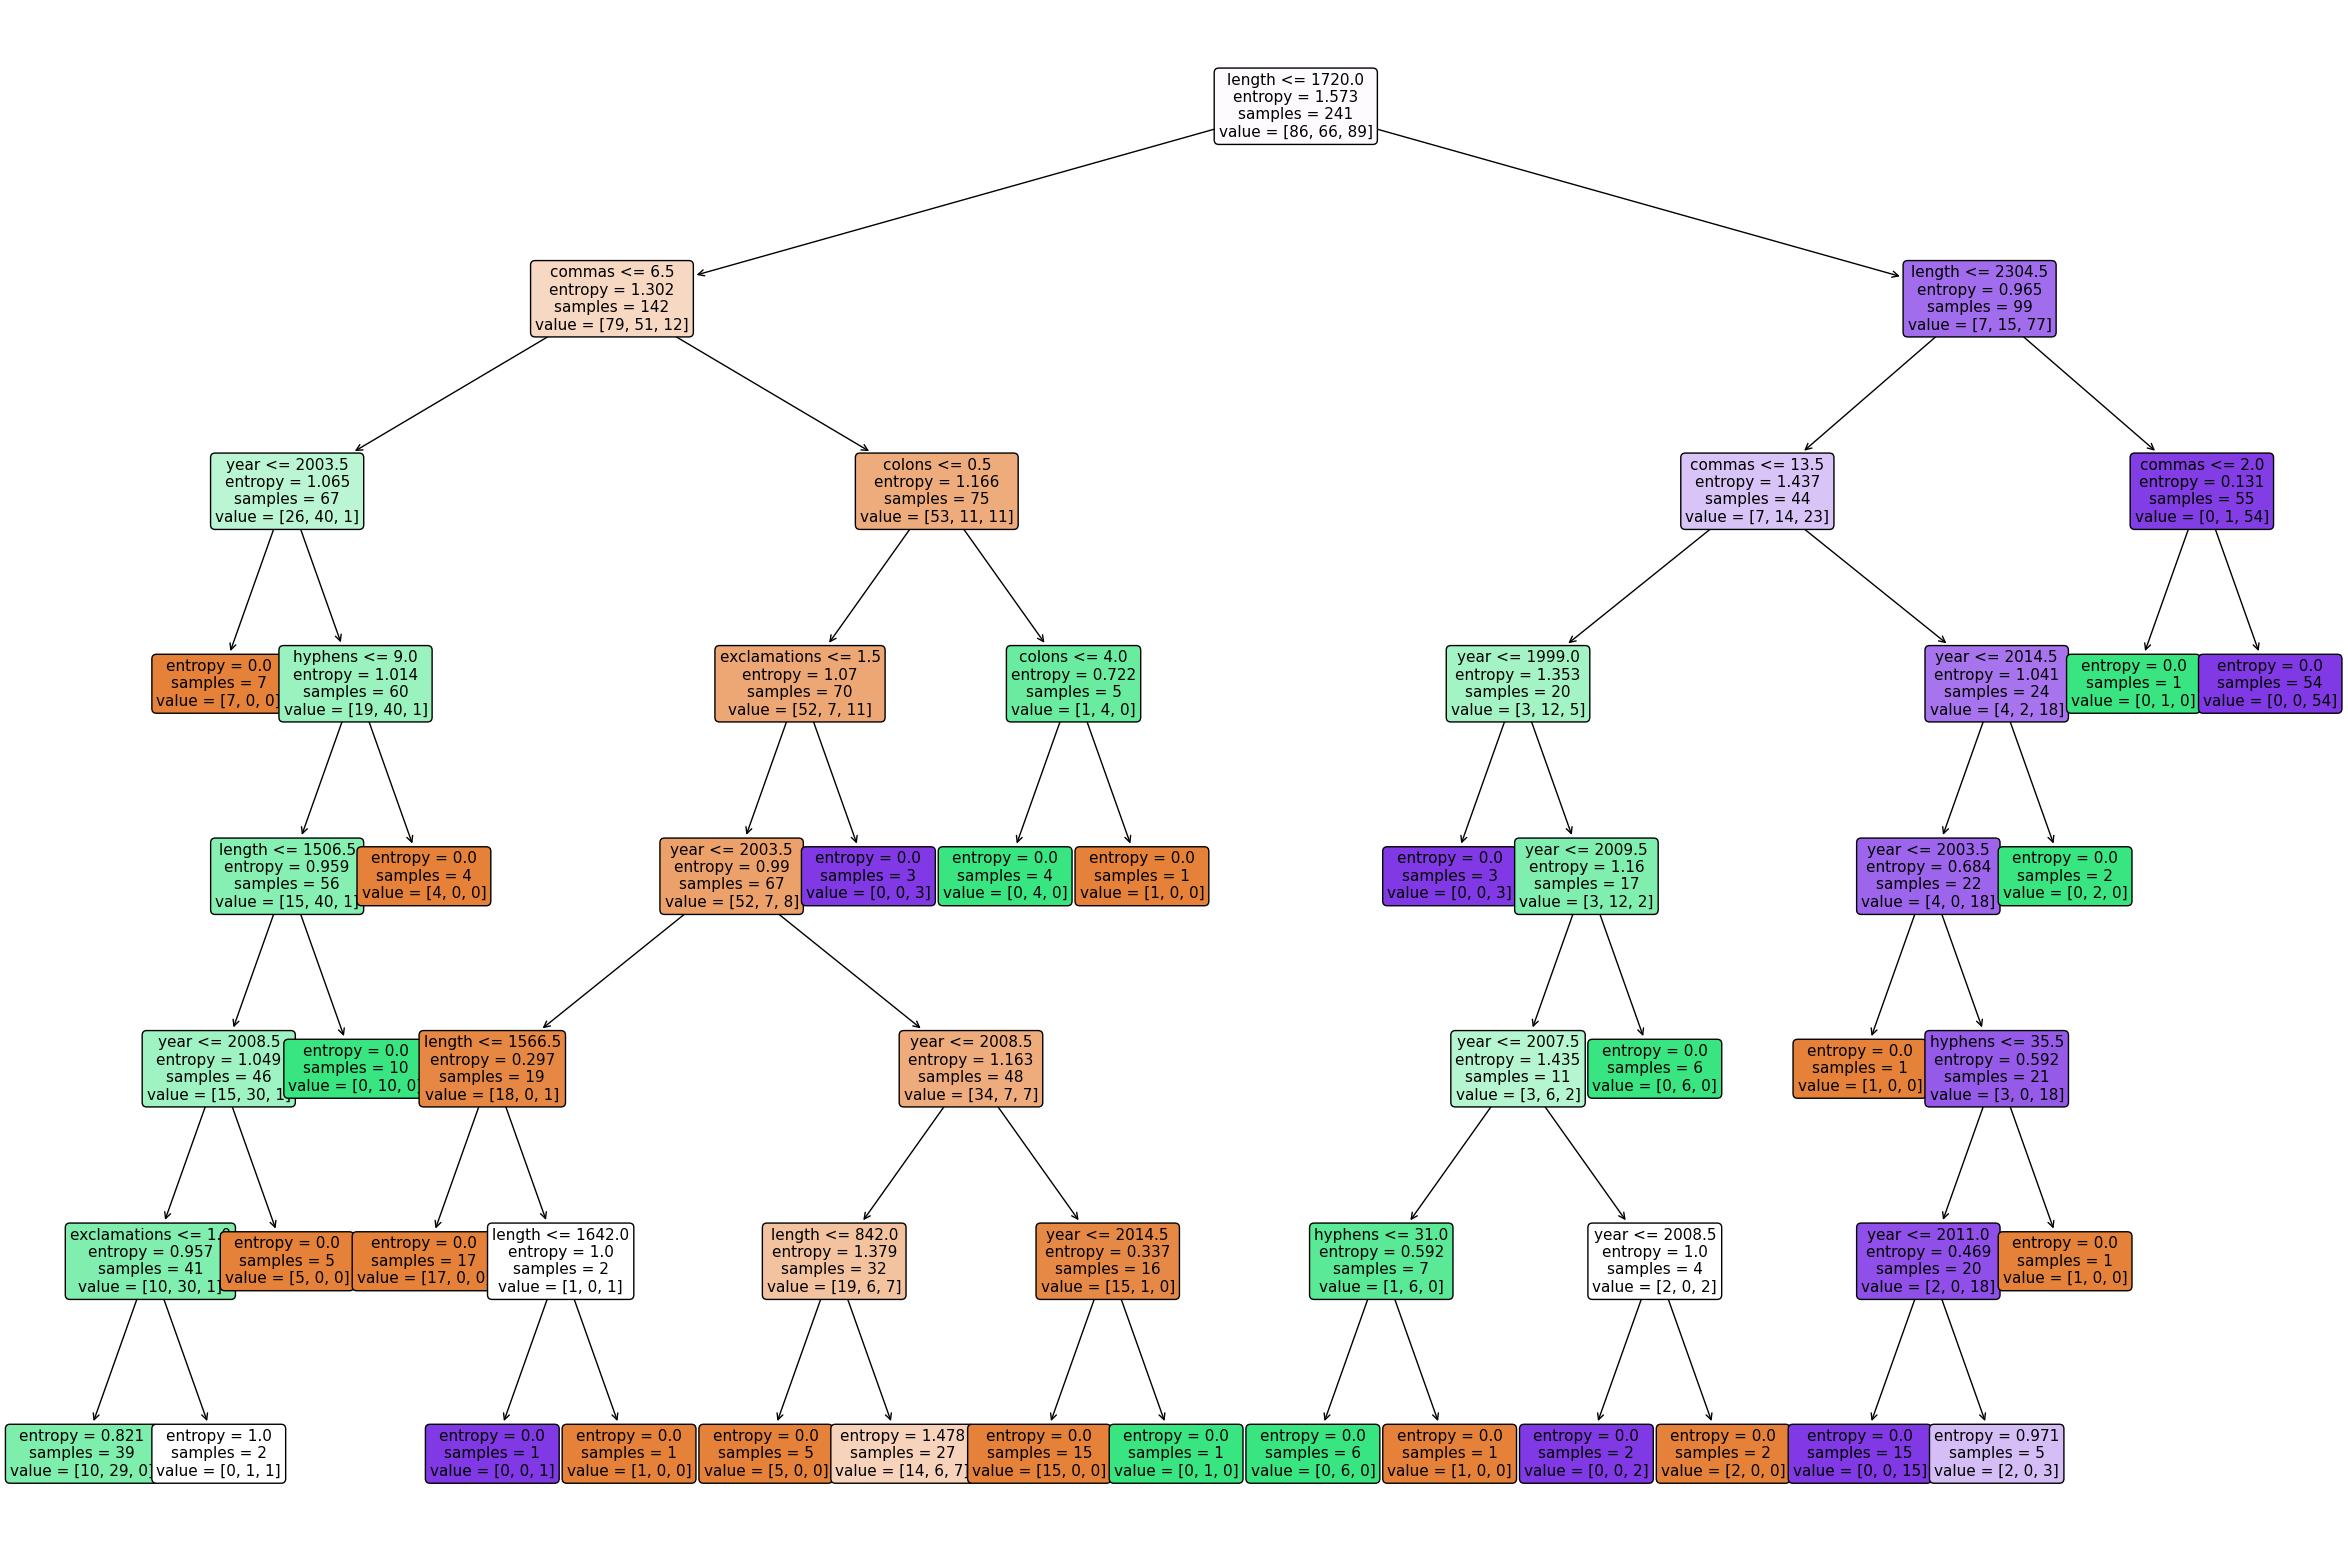

In [199]:
clf.fit(X_train, y_train)
plt.figure(figsize=(30, 20))
tree.plot_tree(clf,
               feature_names=list(X),
               filled=True,
               rounded=True,
               fontsize = 11)


In [201]:

y_test
pred = pd.Series(clf.predict(X_test))

sk.metrics.precision_score(y_test, pred, average='micro')

0.8319327731092437